## Goal:

Develop a model that takes as input a tweet, and gives as output the sentiment of the tweet, i.e. positive or negative

For example, the real sentiment of the tweet

**@metalgear_jp @Kojima_Hideo I want you're T-shirts ! They are so cool ! :D**

is positive, so if this tweet is the input to our model (once already trained), we hope the output would be positive. Note that our model is unlikely to always predict the right sentiment. The accuracy on a validation set will tell us how good (or accurate) our model is.

## Background

The field that analysis sentiment of text, as described above, is called **Natural Language Processing**

In [ ]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK

In [ ]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
print(type(all_positive_tweets))
print('-----------------------------------------------------')
print(type(all_negative_tweets))

<class 'list'>
-----------------------------------------------------
<class 'list'>


**all_positive_tweets** contains 5000 positive tweets

**all_negative_tweets** contains 5000 negative tweets

In [ ]:
print(len(all_positive_tweets))
print('-----------------------------------------------------')
print(len(all_negative_tweets))

5000
-----------------------------------------------------
5000


Each tweet is a string

In [ ]:
print(type(all_positive_tweets[0]))
print('-----------------------------------------------------')
print(type(all_negative_tweets[0]))

<class 'str'>
-----------------------------------------------------
<class 'str'>


Printing two tweet as examples

In [ ]:
print(all_positive_tweets[0])
print('-----------------------------------------------------')
print(all_negative_tweets[10])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
-----------------------------------------------------
I have a really good m&amp;g idea but I'm never going to meet them :(((


## Pre-process raw text for Sentiment analysis

We select a tweet to take a closer look as how tweets look and to illustrate how we will **pre-process (i.e. clean)** the tweets before we apply machine learning to them

In [ ]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Many tweets that are re-tweets started with RT, so we will add this to our example tweet

In [ ]:
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
'Hello, '

'Hello, '

In [ ]:
'My name is Guillermo'

'My name is Guillermo'

In [ ]:
'Hello, '+'My name is Guillermo'

'Hello, My name is Guillermo'

In [ ]:
tweet = 'RT '+tweet

In [ ]:
tweet

'RT My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [ ]:
x = 'Hello, my name is Guillermo'
x[3:]


'lo, my name is Guillermo'

In [ ]:
# prompt: create a function that takes as input a string, and removes the first three charactes if those charactes are 'RT '

def remove_first_three(string):
  if string[:3] == 'RT ':
    return string[3:]
  else:
    return string


In [ ]:
print('Hello, ')
print('it is me')

Hello, 
it is me


In [ ]:
x = 'Hello, ' + 'it is me'
x

'Hello, it is me'

In [ ]:
len(x)

15

In [ ]:
tweet = 'RT ' + tweet

print(tweet)

RT RT My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
import re #re is for regular expressions (working with text)

In [ ]:
tweet

'RT My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

We will remove the **RT** corresponding to re-tweet

In [ ]:
test2 = 'there is no RT '

In [ ]:
test2

'there is no RT '

In [ ]:
test2 = re.sub(r'^RT[\s]+', '', test2)

In [ ]:
test2

'there is no RT '

In [ ]:
test = 'RT hello, RT '
print(tweet)
print('-----------')
# remove old style retweet text "RT ". This way should be enough
# tweet1 = re.sub(r'RT ', '', tweet)
# print(tweet1)
# print('-----------')
# This way is how I found it done and should take care of special cases that I do not know about. Try to learn it yourself. We will use this way
tweet1 = re.sub(r'^RT[\s]+', '', tweet)
print(tweet1)

RT My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
-----------
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Note, the above won't do anything if RT was not there

In [ ]:
print(tweet1)
print('-----------')
print(re.sub(r'^RT[\s]+', '', tweet1))

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
-----------
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Remove old style retweet text "RT " in all the tweets we have.

In [ ]:
a = []
print(a)
a.append('hello')
print(a)
a.append('bye')
print(a)
a.append(4)
print(a)


[]
['hello']
['hello', 'bye']
['hello', 'bye', 4]


In [ ]:
processed_positive_tweets = []
processed_negative_tweets = []
for i in range(5000):
  processed_positive_tweets.append(re.sub(r'^RT[\s]+', '',all_positive_tweets[i]))
  processed_negative_tweets.append(re.sub(r'^RT[\s]+', '',all_negative_tweets[i]))

In [ ]:
print(all_positive_tweets[13])
print(processed_positive_tweets[13])

@jjulieredburn Perfect, so you already know what's waiting for you :)
@jjulieredburn Perfect, so you already know what's waiting for you :)


We show how to remove the hyperlinks from tweets

In [ ]:
print(tweet1)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
# prompt: remove hyperlinks from a string

def remove_hyperlinks(text):
  clean_text = re.sub(r'http\S+', '', text)
  return clean_text

clean_tweet = remove_hyperlinks(tweet1)
print(clean_tweet)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 


In [ ]:
print(tweet1)
print('-----------')
# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet1)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
-----------
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 


Now we remove all the hyperlinks in all the tweets we have

In [ ]:
for i in range(5000):
  processed_positive_tweets[i] = re.sub(r'https?://[^\s\n\r]+', '', processed_positive_tweets[i])
  processed_negative_tweets[i] = re.sub(r'https?://[^\s\n\r]+', '', processed_negative_tweets[i])

In [ ]:
i = 2277
print(processed_positive_tweets[i])
print(all_positive_tweets[i])

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


We show how to remove the hash # sign from tweets

In [ ]:
print(tweet2)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 


In [ ]:
re.sub(r'#', '', tweet2)

'My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… '

In [ ]:
print(tweet2)
print('-----------')
# remove hashtags
# only removing the hash # sign from the word
tweet3 = re.sub(r'#', '', tweet2)
print(tweet3)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 
-----------
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


We remove the hash # sign from all the tweets

In [ ]:
for i in range(5000):
  processed_positive_tweets[i] = re.sub(r'#', '', processed_positive_tweets[i])
  processed_negative_tweets[i] = re.sub(r'#', '', processed_negative_tweets[i])

In [ ]:
i = 2277
print(processed_positive_tweets[i])
print(all_positive_tweets[i])

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


We will next tokenize the tweets. That means we will change the tweet from a single string to a list of words (that of course, are also strings). We will some Python libraries  

In [ ]:
x = 'Hello, my name is Guillermo'

In [ ]:
['Hello,','my', 'name', 'is', 'Guillermo']

['Hello,', 'my', 'name', 'is', 'Guillermo']

In [ ]:
# prompt: split a string

x = 'Hello, my name is Guillermo'
x.split()


['Hello,', 'my', 'name', 'is', 'Guillermo']

In [ ]:
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

Example on how to tokenize tweets (or any string)

In [ ]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

In [ ]:
print(tweet3)
print('-----------------------')
# tokenize tweets
tweet4 = tokenizer.tokenize(tweet3)
print(tweet4)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 
-----------------------
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


Now we tokenize all the tweets we have

In [ ]:
for i in range(5000):
  processed_positive_tweets[i] = tokenizer.tokenize(processed_positive_tweets[i])
  processed_negative_tweets[i] = tokenizer.tokenize(processed_negative_tweets[i])

In [ ]:
i = 2277
print(processed_positive_tweets[i])
print(all_positive_tweets[i])

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
print(processed_positive_tweets)

[['followfriday', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['hey', 'james', '!', 'how', 'odd', ':/', 'please', 'call', 'our', 'contact', 'centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'many', 'thanks', '!'], ['we', 'had', 'a', 'listen', 'last', 'night', ':)', 'as', 'you', 'bleed', 'is', 'an', 'amazing', 'track', '.', 'when', 'are', 'you', 'in', 'scotland', '?', '!'], ['congrats', ':)'], ['yeaaah', 'yipppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days'], ['this', 'one', 'is', 'irresistible', ':)', 'flipkartfashionfriday'], ['we', "don't", 'like', 'to', 'keep', 'our', 'lovely', 'customers', 'waiting', 'for', 'long', '!', 'we', 'hope', 'you', 'enjoy', '!', 'happy', 'friday', '!', '-', 'lwwf', ':)'], ['on', 'second', 'thought', ',', 'there', '’', 's', 'just', 'not', 'enough', 'tim

Next, we are going to remove some words from the tweets (that are lists now). These are words called stop words that are words that are too common and not likely to add to the sentiment. Example of those words are **and**, **I**, **my**, **a**, **the**

We will also remove punctuation

In [ ]:
['today','is','a','nice','day']

['today', 'is', 'a', 'nice', 'day']

In [ ]:
['today','is','nice','day']

['today', 'is', 'nice', 'day']

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords          # module for stop words that come with NLTK
import string                              # for string operations, we need thsi to remove punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# stopwords_english is a list of words
print('Stop words')
print(stopwords_english)
print(len(stopwords_english))

print('Punctuation')
print(string.punctuation)

#string.punctuation is a string made with all the punctuation symbols
print(type(string.punctuation))
string.punctuation
print(len(string.punctuation))

Stop words
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [ ]:
print(tweet4)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [ ]:
words_to_remove = ['a','the']
x = ['today','is','a','nice','day','the','best','day']

In [ ]:
x

['today', 'is', 'a', 'nice', 'day', 'the', 'best', 'day']

In [ ]:
for w in words_to_remove:
  y = []
  for z in x:
    if z != w:
      y.append(z)
  x = y

In [ ]:
print(x)

['today', 'is', 'nice', 'day', 'best', 'day']


In [ ]:
print(tweet4)
print('-----------------------------------------')

tweet5 = []

for w in tweet4: # Go through every word in tweet4
  if (w not in stopwords_english and w not in string.punctuation): # keep the word only if it is not a stop word or punctuation
    tweet5.append(w)
print(tweet5)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
-----------------------------------------
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


Now we remove all the stop words and punctuations from all the tweets

In [ ]:
for i in range(5000):
  t = processed_positive_tweets[i]
  q = []
  for w in t: # Go through every word in your tokens list
    if (w not in stopwords_english and w not in string.punctuation):
      q.append(w)
  processed_positive_tweets[i] = q
  t = processed_negative_tweets[i]
  q = []
  for w in t: # Go through every word in your tokens list
    if (w not in stopwords_english and w not in string.punctuation):
      q.append(w)
  processed_negative_tweets[i] = q

In [ ]:
i = 2277
print(processed_positive_tweets[i])
print(all_positive_tweets[i])

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


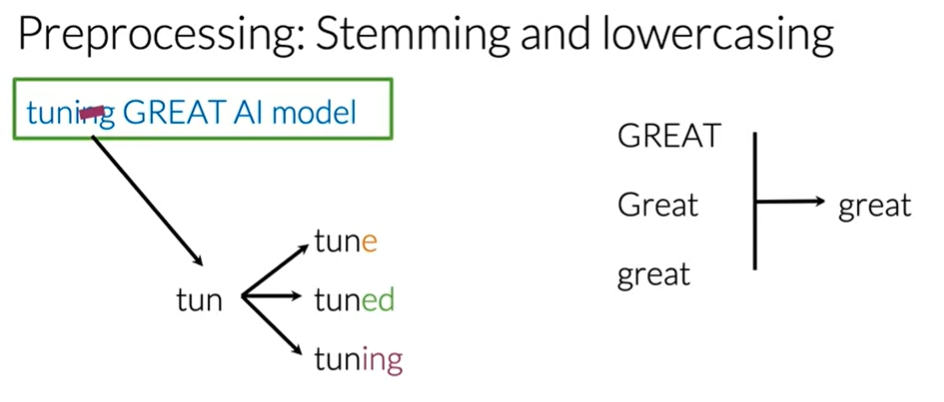

**playing**, **player**, **played**, **plays**, **play** are all considered the same word and changed to **play**

In [ ]:
from nltk.stem import PorterStemmer

Example on how we stem

In [ ]:
stemmer = PorterStemmer()

In [ ]:
print(tweet5)
print('--------------------------------------')

# Create an empty list to store the stems
tweet6 = []

for w in tweet5:
  s = stemmer.stem(w)  # stemming word
  tweet6.append(s)  # append to the list

print(tweet6)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
--------------------------------------
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


Now we stem all our tweets

In [ ]:
for i in range(5000):
  t = processed_positive_tweets[i]
  q = []
  for w in t:
    s = stemmer.stem(w)
    q.append(s)
  processed_positive_tweets[i] = q
  t = processed_negative_tweets[i]
  q = []
  for w in t:
    s = stemmer.stem(w)
    q.append(s)
  processed_negative_tweets[i] = q

In [ ]:
i = 2277
print(processed_positive_tweets[i])
print(all_positive_tweets[i])

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Now we are going to put all the tweets (positive and negatives) in a list

In [ ]:
# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = processed_positive_tweets + processed_negative_tweets

For example

In [ ]:
print(tweets[0])
print(processed_positive_tweets[0])
print('------------------------------')
print(tweets[5010])
print(processed_negative_tweets[10])

['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']
['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']
------------------------------
['realli', 'good', 'g', 'idea', "i'm", 'never', 'go', 'meet', ':(']
['realli', 'good', 'g', 'idea', "i'm", 'never', 'go', 'meet', ':(']


In [ ]:
len(tweets)

10000

In [ ]:
tweets[0]

['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

Now we are going to start using numpy

In [ ]:
import numpy as np

In [ ]:
# make a numpy array representing labels of the tweets, 1 positive, 0 negative
y = np.append(np.ones(5000), np.zeros(5000))

In [ ]:
y

array([1., 1., 1., ..., 0., 0., 0.])

**Dictionaries**

Similar to lists and tuples

In [ ]:
x = []
print(x,len(x))


[] 0


initialize an empty dictionary

In [ ]:
x = {}

In [ ]:
type(x)

dict

In [ ]:
len(x)

0

In [ ]:
x

{}

In [ ]:
print(x)

{}


In [ ]:
x['hola'] = 'hello'

In [ ]:
x

{'hola': 'hello'}

In [ ]:
x['manzana'] = 'apple'

In [ ]:
x

{'hola': 'hello', 'manzana': 'apple'}

In [ ]:
x['1'] = 7
x

{'hola': 'hello', 'manzana': 'apple', '1': 7}

The '1' is called key and the 7 value

Note that the key does not have to be an integer, it can be other things, like strings

In [ ]:
x[2] = 9

In [ ]:
print(x)

{'hola': 'hello', 'manzana': 'apple', '1': 7, 2: 9}


In [ ]:
x[2]

9

In [ ]:
x[1] = 'yes'
print(x)

{'hola': 'hello', 'manzana': 'apple', '1': 7, 2: 9, 1: 'yes'}


In [ ]:
x[('hello',1)] = 5

In [ ]:
x

{'hola': 'hello', 'manzana': 'apple', '1': 7, 2: 9, 1: 'yes', ('hello', 1): 5}

We will create two features for each tweet

One is the positive feature

The other will be the negative feature

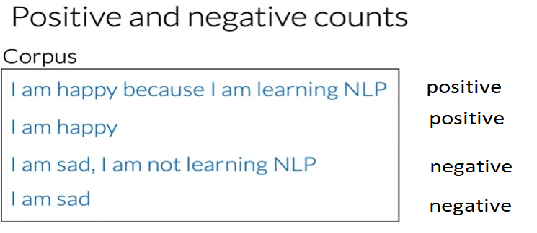

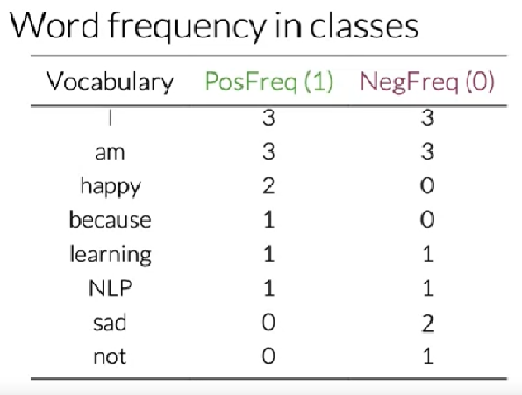

We will encode this information in a dictionary as follows:

In [ ]:
fre = {}
fre[('I',1)] = 3 # positive frequency of the word I
fre[('I',0)] = 3
fre[('am',1)] = 3
fre[('am',0)] = 3
fre[('happy',1)] = 2
fre[('because',1)] = 1
fre[('learning',1)] = 1
fre[('learning',0)] = 1
fre[('NLP',1)] = 1
fre[('NLP',0)] = 1
fre[('sad',0)] = 2
fre[('not',0)] = 1

In [ ]:
all_tweets = [ ['I', 'am', 'happy', 'because', 'I', 'am', 'learning', 'NLP'], ['I', 'am', 'happy'], ['I', 'am', 'sad', 'I', 'am', 'not', 'learning', 'NLP'], ['I', 'am', 'sad'] ]
sen = [1,1,0,0]

In [ ]:
all_tweets

[['I', 'am', 'happy', 'because', 'I', 'am', 'learning', 'NLP'],
 ['I', 'am', 'happy'],
 ['I', 'am', 'sad', 'I', 'am', 'not', 'learning', 'NLP'],
 ['I', 'am', 'sad']]

In [ ]:
sen

[1, 1, 0, 0]

In [ ]:
def frequencies(all_tweets,sen):
  freq = {}
  for i in range(len(all_tweets)):
    tweet = all_tweets[i]
    s = sen[i]
    for w in tweet:
      if (w,s) in freq:
        freq[(w,s)] = freq[(w,s)] + 1
      else:
        freq[(w,s)] = 1
  return freq

In [ ]:
freq

{('I', 1): 3,
 ('am', 1): 3,
 ('happy', 1): 2,
 ('because', 1): 1,
 ('learning', 1): 1,
 ('NLP', 1): 1,
 ('I', 0): 3,
 ('am', 0): 3,
 ('sad', 0): 2,
 ('not', 0): 1,
 ('learning', 0): 1,
 ('NLP', 0): 1}

In [ ]:
def times(fre,w,s):
  if (w,s) in fre:
    return fre[(w,s)]
  else:
    return 0

In [ ]:
times(fre,'sad',1)

0

We say that fre[('I',1)] is the positive frequency of the word 'I'. This is the number of times the word 'I' appears in the positive tweets.

We say that fre[('I',0)] is the negative frequency of the word 'I'. This is the number of times the word 'I' appears in the negative tweets.

We say the same for the other words.

Example: The positive frequency of 'happy' is

In [ ]:
fre[('happy',1)]

2

This function will take the list of tweets and the labels, and will return the dictionary above, i.e. fre[('w',1)] = number of times the word 'w' appears in all the positive tweets and fre[('w',0)] = number of times the word 'w' appears in all the negative tweets

In [ ]:
# input: list of tweet and the sentiments (1s and 0s)
# outpu: dictionary with positive and negative frequencies of the strings in the tweets
def build_freqs(tweets, labels):
  freqs = {}
  for i in range(len(tweets)):
    tweet = tweets[i]
    sentiment = labels[i]
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] = freqs[pair] + 1
      else:
        freqs[pair] = 1
  return freqs

We will test the above function with only the 4 tweets above

In [ ]:
tws = []
nt = ['I', 'am', 'happy', 'because', 'I', 'am', 'learning', 'NLP']
tws.append(nt)
nt = ['I', 'am', 'happy']
tws.append(nt)
nt = ['I', 'am', 'sad', 'I', 'am', 'not', 'learning', 'NLP']
tws.append(nt)
nt = ['I', 'am', 'sad']
tws.append(nt)
sen = [1,1,0,0]

In [ ]:
tws

[['I', 'am', 'happy', 'because', 'I', 'am', 'learning', 'NLP'],
 ['I', 'am', 'happy'],
 ['I', 'am', 'sad', 'I', 'am', 'not', 'learning', 'NLP'],
 ['I', 'am', 'sad']]

In [ ]:
sen

[1, 1, 0, 0]

In [ ]:
fre_new = build_freqs(tws, sen)

In [ ]:
for k in fre:
  print(k,fre[k])

('I', 1) 3
('I', 0) 3
('am', 1) 3
('am', 0) 3
('happy', 1) 2
('because', 1) 1
('learning', 1) 1
('learning', 0) 1
('NLP', 1) 1
('NLP', 0) 1
('sad', 0) 2
('not', 0) 1


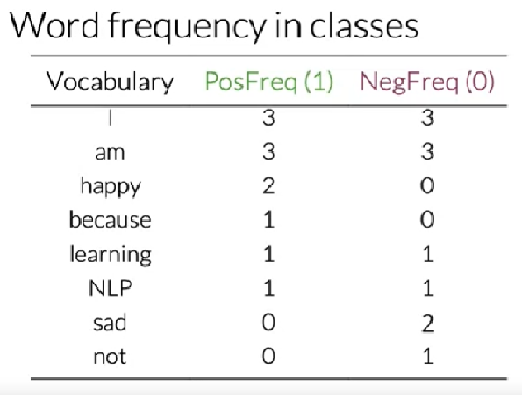

Now we create the frequency dictionary with all the tweets

In [ ]:
# create frequency dictionary
freqs = build_freqs(tweets, y)

In [ ]:
fre_new

{('I', 1): 3,
 ('am', 1): 3,
 ('happy', 1): 2,
 ('because', 1): 1,
 ('learning', 1): 1,
 ('NLP', 1): 1,
 ('I', 0): 3,
 ('am', 0): 3,
 ('sad', 0): 2,
 ('not', 0): 1,
 ('learning', 0): 1,
 ('NLP', 0): 1}

Consider the tweet

['I', 'am', 'happy', 'because', 'I', 'am', 'learning', 'NLP']

We will construct two features for this tweet:

The first feature is the sum of the positive frequencies of the words in the tweet:

$x_0 = $ fre[('I',1)] + fre[('am',1)] + fre[('happy',1)] + fre[('because',1)] + fre[('I',1)] + fre[('am',1)] + fre[('learning',1)] + fre[('NLP',1)] = 3 + 3 + 2 + 1 + 3 + 3 + 1 + 1 = 17

The second feature is the sum of the negative frequencies of the words in the tweet:

$x_1 = $ fre[('I',0)] + fre[('am',0)] + fre[('happy',0)] + fre[('because',0)] + fre[('I',0)] + fre[('am',0)] + fre[('learning',0)] + fre[('NLP',0)] = 3 + 3 + 0 + 0 + 3 + 3 + 1 + 1 = 14

The function below computes both features of all the tweets in a 2-dimensional array. If we call that array X, the first feature of the i tweet is X[i,0] and the second feature of the i tweet is X[i,1]

In [ ]:
np.zeros((4,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
def features(tweets,freqs):
 X = np.zeros((len(tweets),2))
 for i in range(len(tweets)):
   t = tweets[i]
   for w in t:
     if (w,1) in freqs:
       X[i,0] = X[i,0] + freqs[(w,1)]
     if (w,0) in freqs:
       X[i,1] = X[i,1] + freqs[(w,0)]
 return X

Example on the list of 4 tweets, **tws**, using the frequencies **fre**

In [ ]:
tws

[['I', 'am', 'happy', 'because', 'I', 'am', 'learning', 'NLP'],
 ['I', 'am', 'happy'],
 ['I', 'am', 'sad', 'I', 'am', 'not', 'learning', 'NLP'],
 ['I', 'am', 'sad']]

In [ ]:
fre

{('I', 1): 3,
 ('I', 0): 3,
 ('am', 1): 3,
 ('am', 0): 3,
 ('happy', 1): 2,
 ('because', 1): 1,
 ('learning', 1): 1,
 ('learning', 0): 1,
 ('NLP', 1): 1,
 ('NLP', 0): 1,
 ('sad', 0): 2,
 ('not', 0): 1}

In [ ]:
X = features(tws,fre)

We know the feartures of the first tweet are 17 and 14.

Let's check

In [ ]:
X

array([[17., 14.],
       [ 8.,  6.],
       [14., 17.],
       [ 6.,  8.]])

Now let's compute the feature of all our tweets

In [ ]:
X = features(tweets,freqs)

In [ ]:
X

array([[3887.,   72.],
       [4613.,  518.],
       [3883.,  161.],
       ...,
       [  34., 4653.],
       [  10., 4598.],
       [ 116.,  590.]])

In [ ]:
X.shape

(10000, 2)

In [ ]:
y.shape

(10000,)

Now we are in the scenario of previous projects.

X is a 2d array, X[i,:] are the features of the $i^{th}$ example

y is a 1d array, y[i] is the label of the $i^{th}$ example

We will use logistic regression

In [ ]:
i = 6400
print(X[i,:],y[i])

[ 137. 4892.] 0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report

(0.0, 1000.0)

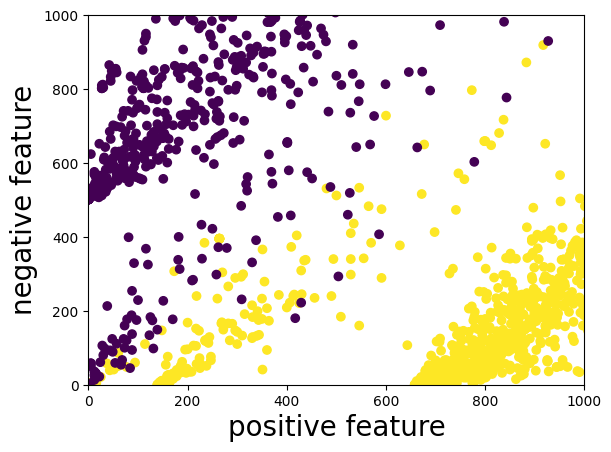

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('positive feature',fontsize=20)
plt.ylabel('negative feature',fontsize=20)
plt.xlim(0,1000)
plt.ylim(0,1000)

Split into training and validation set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=4)

Scaling the features. Create the scaler (object that will compute the means and standard deviations and scale upon demand)

In [ ]:
scaler = preprocessing.StandardScaler()

Tell the scaler that the data to be used to compute the mean and startdard deviation to later scale is X_train

In [ ]:
scaler.fit(X_train)

StandardScaler()

Scale the features

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

We will use the function below to plot decision boundaries. If you have not yet, watch the linear and non-linear decisions boundary videos

In [ ]:
def decision_boundary():
  xl, xr, dx = 0, 1000, 10
  yl, yr, dy = 0, 1000, 10
  u = np.arange(xl,xr,dx)
  v = np.arange(yl,yr,dy)
  u_r = np.ones((len(v),1))*u.reshape(1,len(u))
  v_r = v.reshape(len(v),1)*np.ones((1,len(u)))
  u_r = u_r.reshape(-1)
  v_r = v_r.reshape(-1)
  p_grid = np.column_stack((u_r,v_r))
  p_grid_scaled = scaler.transform(p_grid)
  f_grid = model.predict(p_grid_scaled)
  f_grid = f_grid.reshape((len(v),len(u)))
  plt.contour(u,v,f_grid,levels=[0.5])
  return

We are creating an object from the libraries that will allow us to compute the errors on the validation and training sets

In [ ]:
bce = BinaryCrossentropy(from_logits=False)

Using logistic regression

Epoch 1/200
235/235 [==============================] - 1s 945us/step - loss: 1.0683
Epoch 2/200
235/235 [==============================] - 0s 978us/step - loss: 0.8539
Epoch 3/200
235/235 [==============================] - 0s 1ms/step - loss: 0.6768
Epoch 4/200
235/235 [==============================] - 0s 1ms/step - loss: 0.5351
Epoch 5/200
235/235 [==============================] - 0s 1ms/step - loss: 0.4245
Epoch 6/200
235/235 [==============================] - 0s 1ms/step - loss: 0.3415
Epoch 7/200
235/235 [==============================] - 0s 1ms/step - loss: 0.2787
Epoch 8/200
235/235 [==============================] - 0s 909us/step - loss: 0.2313
Epoch 9/200
235/235 [==============================] - 0s 944us/step - loss: 0.1947
Epoch 10/200
235/235 [==============================] - 0s 951us/step - loss: 0.1663
Epoch 11/200
235/235 [==============================] - 0s 947us/step - loss: 0.1439
Epoch 12/200
235/235 [==============================] - 0s 931us/step - loss: 0.1263

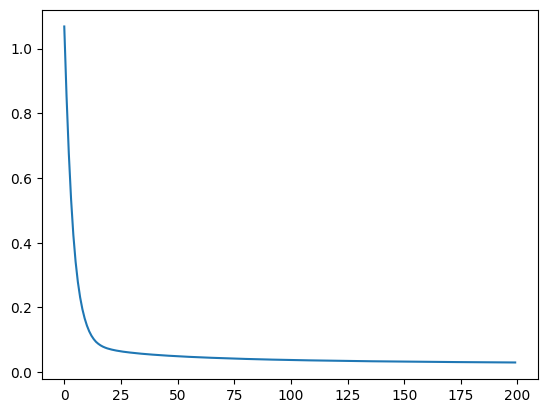

In [ ]:
# deletes model if it was created before
model = 0
# Create a neural network. Only the input layer
model = Sequential()
# Adds a layer with 1 node. It also sets the
# activation function to sigmoid
#model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Tells what error will be minimized. Note: loss = error
model.compile(loss='binary_crossentropy')
# Trains the model, epochs is the muber of steps the algorith takes (beyond
# the scope of our course, verbose = 0 is so that it does not print stuff on the
# screen)
model.fit(X_train_scaled,y_train,epochs=200,verbose=1)
# creates a list with the value of the error after each step
J_list = model.history.history['loss']
# plots the error after each step
plt.plot(J_list)

Scatter plot of the features and decision boundary

313/313 [==============================] - 0s 756us/step


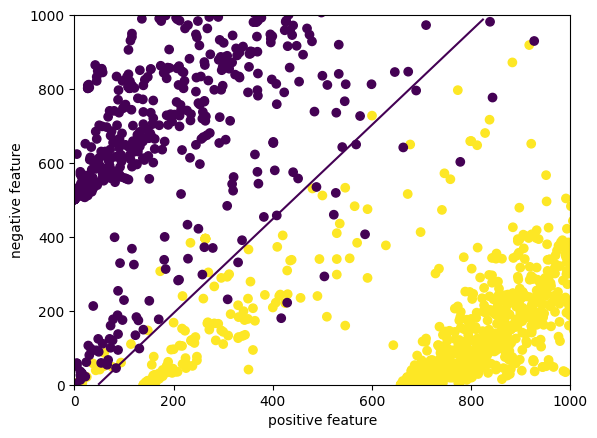

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
decision_boundary()
plt.xlabel('positive feature')#,fontsize=10)
plt.ylabel('negative feature')#,fontsize=10)
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.savefig('f1')

Binary crossentropy erros on the validation and training sets

In [ ]:
y_val_hat = model.predict(X_val_scaled)
print(bce(y_val.reshape(-1,1), y_val_hat).numpy())
print('---')
y_train_hat = model.predict(X_train_scaled)
print(bce(y_train.reshape(-1,1), y_train_hat).numpy())

79/79 [==============================] - 0s 793us/step


NameError: name 'bce' is not defined

How did we do on the training set?

In [ ]:
y_train_hat_cat = 1*(model.predict(X_train_scaled) > 0.5)
print(classification_report(y_train,y_train_hat_cat))

235/235 [==============================] - 0s 791us/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3737
         1.0       0.99      0.99      0.99      3763

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



How did we do on the validation set?

In [ ]:
y_val_hat_cat = 1*(model.predict(X_val_scaled) > 0.5)
print(classification_report(y_val,y_val_hat_cat))

79/79 [==============================] - 0s 825us/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1263
         1.0       1.00      0.99      0.99      1237

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

